![Vidi_Waterflux_Banner](https://raw.githubusercontent.com/ITC-Water-Resources/Vidi-waterflux-merch/refs/heads/main/jupyter/Vidi_Waterflux_Banner.png)
*Roelof Rietbroek, Sedigheh Karimi, Amin Shakya EGU 2025*

# Create timeseries plots of fluxes and and storage for dedicated basins

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import geopandas as gpd
import pandas as pd

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from geoslurp import GeoslurpManager
from geoslurp.tools.xarray import *
import geoslurp.tools.pandas
import matplotlib as mpl
from scipy.integrate import cumulative_trapezoid


#local python tools
from common.config import *

In [3]:
conf=read_config()
datadir=conf['dataroot']
mediadir=conf['mediaroot']

In [22]:
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
# mpl.rc('text', usetex=True)

In [4]:
#load TWS storage and flux data
dstws=xr.open_dataset(os.path.join(datadir,'dsdtbasav.nc')).rename(name='basin')


#load the ERA5 P,ET data
# dsera5=xr.open_dataset(os.path.join(datadir,'precip_evap_flux_monthly.nc'))
dsera5=xr.open_dataset(os.path.join(datadir,conf['ncp-et_comb']))
display(dsera5)

<xarray.Dataset> Size: 1MB
Dimensions:     (time: 276, basin: 124, month: 12)
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 2kB 2002-04-01T06:00:00 ... 2025-03-01T...
    expver      (time) <U4 4kB ...
  * basin       (basin) <U39 19kB 'SETIT' ... 'TIBETAN PLATEAU'
    basin_area  (basin) float64 992B ...
  * month       (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    avg_ie      (basin, time) float64 274kB ...
    avg_tprate  (basin, time) float64 274kB ...
    p_mean      (basin) float64 992B ...
    et_mean     (basin) float64 992B ...
    p_cuma      (basin, time) float64 274kB ...
    et_cuma     (basin, time) float64 274kB ...
    p_clima     (basin, month) float64 12kB ...
    et_clima    (basin, month) float64 12kB ...

In [5]:
#load glofas data
dsglofas=xr.open_dataset(os.path.join(datadir,conf['glofas-comb'])).set_xindex('basins').rename(basins='basin')
display(dsglofas)
dsglofas_intp=dsglofas.interp(time=dsera5.time)
display(dsglofas_intp)

/tmp/ipykernel_6869/2435424807.py:2: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dsglofas=xr.open_dataset(os.path.join(datadir,conf['glofas-comb'])).set_xindex('basins').rename(basins='basin')


<xarray.Dataset> Size: 13MB
Dimensions:        (time: 9132, noutlets: 121, month: 12)
Coordinates:
  * time           (time) datetime64[ns] 73kB 2000-01-01 ... 2024-12-31
    step           timedelta64[ns] 8B ...
    surface        float64 8B ...
    latitude       (noutlets) float64 968B ...
    longitude      (noutlets) float64 968B ...
    valid_time     (time) datetime64[ns] 73kB ...
  * basin          (noutlets) <U39 19kB 'AMAZONAS' 'AMUR' ... 'ZAMBEZI'
  * month          (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: noutlets
Data variables:
    dis24          (time, noutlets) float32 4MB ...
    endo           (noutlets) int64 968B ...
    upstream_area  (noutlets) float64 968B ...
    dis24_mean     (noutlets) float32 484B ...
    dis24_cuma     (noutlets, time) float64 9MB ...
    dis24_clima    (month, noutlets) float32 6kB ...

<xarray.Dataset> Size: 570kB
Dimensions:        (noutlets: 121, time: 276, month: 12)
Coordinates:
    step           timedelta64[ns] 8B 1 days
    surface        float64 8B 0.0
    latitude       (noutlets) float64 968B -0.525 53.08 57.68 ... 63.03 -18.62
    longitude      (noutlets) float64 968B -50.87 140.9 11.83 ... -164.6 36.28
  * basin          (noutlets) <U39 19kB 'AMAZONAS' 'AMUR' ... 'ZAMBEZI'
  * month          (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * time           (time) datetime64[ns] 2kB 2002-04-01T06:00:00 ... 2025-03-...
    number         int64 8B ...
    expver         (time) <U4 4kB ...
Dimensions without coordinates: noutlets
Data variables:
    dis24          (time, noutlets) float64 267kB 3.014e+05 1.758e+03 ... nan
    endo           (noutlets) int64 968B 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    upstream_area  (noutlets) float64 968B 5.892e+12 1.992e+12 ... 1.37e+12
    dis24_mean     (noutlets) float32 484B 2.18e+05 9.211e+03 ... 5.099e+03
    dis24_cuma     (noutlets, time) float64 267kB 7.752e+11 1.011e+12 ... nan
    dis24_clima    (month, noutlets) float32 6kB 2.252e+05 ... 3.37e+03

<xarray.Dataset> Size: 547kB
Dimensions:        (noutlets: 121, time: 264, month: 12)
Coordinates:
    step           timedelta64[ns] 8B 1 days
    surface        float64 8B 0.0
    latitude       (noutlets) float64 968B -0.525 53.08 57.68 ... 63.03 -18.62
    longitude      (noutlets) float64 968B -50.87 140.9 11.83 ... -164.6 36.28
  * basin          (noutlets) <U39 19kB 'AMAZONAS' 'AMUR' ... 'ZAMBEZI'
  * month          (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * time           (time) datetime64[ns] 2kB 2002-04-01T06:00:00 ... 2025-03-...
    number         int64 8B ...
    expver         (time) <U4 4kB ...
Dimensions without coordinates: noutlets
Data variables:
    dis24          (time, noutlets) float64 256kB 3.014e+05 1.758e+03 ... nan
    endo           (noutlets) int64 968B 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    upstream_area  (noutlets) float64 968B 5.892e+12 1.992e+12 ... 1.37e+12
    dis24_mean     (noutlets) float32 484B 2.18e+05 9.211e+03 ... 5.099e+03
    dis24_cuma     (noutlets, time) float64 256kB 7.752e+11 1.011e+12 ... nan
    dis24_clima    (month, noutlets) float32 6kB 2.252e+05 ... 3.37e+03

In [6]:
#load European drought index
dsdrought=xr.open_dataset(os.path.join(datadir,'drought_and_flood/cdinx_m_edo_20250101_20250401_t.nc'))
display(dsdrought)

<xarray.Dataset> Size: 175MB
Dimensions:      (time: 10, band: 1, lat: 1200, lon: 1824)
Coordinates:
  * time         (time) datetime64[ns] 80B 2025-01-01 2025-01-11 ... 2025-04-01
  * band         (band) int64 8B 1
  * lon          (lon) float64 15kB -24.98 -24.94 -24.9 ... 50.9 50.94 50.98
  * lat          (lat) float64 10kB 71.98 71.94 71.9 71.85 ... 22.1 22.06 22.02
Data variables:
    cdinx        (time, band, lat, lon) float64 175MB ...
    spatial_ref  int64 8B ...
Attributes: (12/45)
    01_PROD_CODE:               cdinx
    02_GROUP_ID:                13
    03_SCALE_ID:                edo
    04_TITLE:                   Combined Drought Indicator (CDI)
    05_ABSTRACT:                The Combined Drought Indicator (CDI) is an in...
    06_DATA_TYPE:               raster
    ...                         ...
    name:                       cdinx_m_edo_t_400_z02
    source_key:                 archive/cdinx/edo/ver4-0-0/2025/cdinx_m_edo_2...
    time:                       2025-01-01
    time_produced:              2025-01-24 15:30:29
    AREA_OR_POINT:              Area
    DATASET_COPYRIGHT:          Copyright notice ------------------  (c) Euro...

In [19]:
dsdrought.time

<xarray.DataArray 'time' (time: 10)> Size: 80B
array(['2025-01-01T00:00:00.000000000', '2025-01-11T00:00:00.000000000',
       '2025-01-21T00:00:00.000000000', '2025-02-01T00:00:00.000000000',
       '2025-02-11T00:00:00.000000000', '2025-02-21T00:00:00.000000000',
       '2025-03-01T00:00:00.000000000', '2025-03-11T00:00:00.000000000',
       '2025-03-21T00:00:00.000000000', '2025-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 80B 2025-01-01 2025-01-11 ... 2025-04-01

# plotting function

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


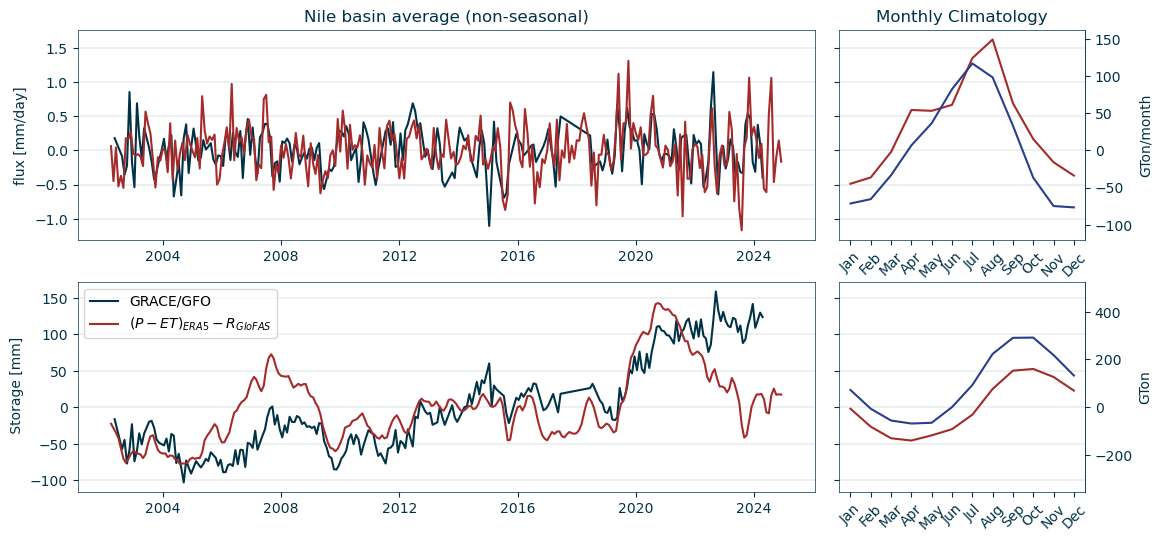

In [77]:
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['axes.edgecolor'] = posterdark
mpl.rcParams['grid.color']=posterdark
mpl.rcParams['xtick.color']=posterdark
mpl.rcParams['ytick.color']=posterdark
mpl.rcParams['axes.labelcolor']=posterdark
mpl.rcParams['axes.titlecolor']=posterdark
grdopt=dict(axis="y",linewidth=0.1)
def make_plot(basin,savefig=False):
    f,axs=plt.subplots(ncols=2,nrows=2,figsize=(13,6), width_ratios=[3, 1],sharey='row')
    axstore=axs[1,0]
    axstore_clim=axs[1,1]
    axflux=axs[0,0]
    axflux_clim=axs[0,1]
    
    # axstore=axs[1]
    # axflux=axs[0]
    #basin selection
    tws=dstws.sel(basin=basin)
    era5=dsera5.sel(basin=basin)
    area=era5.basin_area.item()
    glofas=dsglofas_intp.sel(basin=basin)
    endorheic=glofas.endo.item() != 0 
    # glofas_orig=dsglofas.sel(basin=basin)
    pet_r=era5.avg_tprate+era5.avg_ie-endorheic*glofas.dis24
    pet_r_cuma=era5.p_cuma+era5.et_cuma-endorheic*glofas.dis24_cuma
    
    #climatologies
    pet_r_clim=pet_r.groupby('time.month').mean()
    tws_clim=tws.tws_ddk5_vw2016.groupby('time.month').mean()
    cuma_pet_r_clim=(pet_r_cuma-pet_r_cuma.mean('time')).groupby('time.month').mean()
    twsflux_clim=tws.difft_vw2016.groupby('time.month').mean()
    
    #non-seasonal anomalies
    dpet_r=pet_r-pet_r_clim.loc[pet_r.time.dt.month]
    dpet_r_cuma=pet_r_cuma-cuma_pet_r_clim.loc[pet_r.time.dt.month]
    dtws=tws.tws_ddk5_vw2016-tws_clim.loc[tws.time.dt.month]
    ddifftws=tws.difft_vw2016-twsflux_clim.loc[tws.time.dt.month]
    
    storescale=1e3
    storescale_era5=1e3/area
    axstore.plot(tws.time,storescale*dtws,color=posterdark,label='GRACE/GFO')
    axstore.plot(era5.time,storescale_era5*(dpet_r_cuma-dpet_r_cuma.mean('time')),color=posterred,label='$(P-ET)_{ERA5}-R_{GloFAS}$')
    axstore.set_ylabel(' Storage [mm]')
    
    # secax = axstore.secondary_yaxis('right', functions=(lambda mm: area*mm*1e-12, lambda gton: 1e12*gton/area))
    # secax.set_ylabel('GTon')
    axstore.grid(**grdopt)
    
    fluxscale_grc=86400*1e3
    fluxscale_era5=86400*1e3/area
    axflux.set_title(f'{basin.capitalize()} basin average (non-seasonal)')
    axflux.plot(tws.time,fluxscale_grc*ddifftws,color=posterdark,label='GRACE/GFO')
    # axflux.plot(era5.time,fluxscale_era5*(era5.avg_tprate+era5.avg_ie),color=posterred,label='ERA5 P-ET')
    # axflux.plot(glofas.time,fluxscale_era5*(glofas.dis24),color=itcgreen,label='GLOFAS')
    # axflux.plot(glofas.time,fluxscale_era5*(glofas.dis24),color=itcgreen,label='GLOFAS')
    axflux.plot(glofas.time,fluxscale_era5*(dpet_r),color=posterred,label='ERA5/GloFAS P-ET-R')
    axflux.set_ylabel('flux [mm/day]')
    # secax = axflux.secondary_yaxis('right', functions=(lambda mmdy: 30*area*mmdy*1e-12, lambda gtonmn: 1e12*gtonmn/(30*area)))
    # secax.set_ylabel('GTon/month')
    axflux.grid(**grdopt)

    #plot climatology
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    
    axflux_clim.plot(months,fluxscale_era5*pet_r_clim,color=posterred)
    
    
    axflux_clim.plot(months,fluxscale_grc*twsflux_clim,color=itcblue)
    # axflux_clim.set_ylabel('flux [mm/day]')
    # axflux_clim.yaxis.set_label_position("right")
    # axflux_clim.yaxis.tick_right()
    axflux_clim.set_xticklabels(months, rotation=45)
    axflux_clim.set_title('Monthly Climatology')
    axflux_clim.grid(**grdopt)
    secax = axflux_clim.secondary_yaxis('right', functions=(lambda mmdy: 30*area*mmdy*1e-12, lambda gtonmn: 1e12*gtonmn/(30*area)))
    secax.set_ylabel('GTon/month')
    
    #storage climatology
    

    axstore_clim.plot(months,storescale_era5*cuma_pet_r_clim,color=posterred)
    axstore_clim.plot(months,storescale*tws_clim,color=itcblue)
    # axstore_clim.set_ylabel('storage [mm]')
    # axstore_clim.yaxis.set_label_position("right")
    # axstore_clim.yaxis.tick_left()
    axstore_clim.set_xticklabels(months, rotation=45)
    axstore_clim.grid(**grdopt)
    # axstore_clim.set_title('Monthly Climatology')
    secax = axstore_clim.secondary_yaxis('right', functions=(lambda mm: area*mm*1e-12, lambda gton: 1e12*gton/area))
    secax.set_ylabel('GTon')
    axstore.legend()
    # axflux_clim.set_xticks(months,fontsize=10)
    if savefig:
        fout=os.path.join(mediadir,basin.replace(' ','_').replace('/','-')+".svg")
        plt.savefig(fout,facecolor=add_alpha('#ffffff',0.5),bbox_inches='tight')
    plt.subplots_adjust(wspace=0.05)
    plt.show()
    return glofas,era5,tws,pet_r

glofas,era5,tws,pet_r=make_plot(basin='NILE',savefig=True)

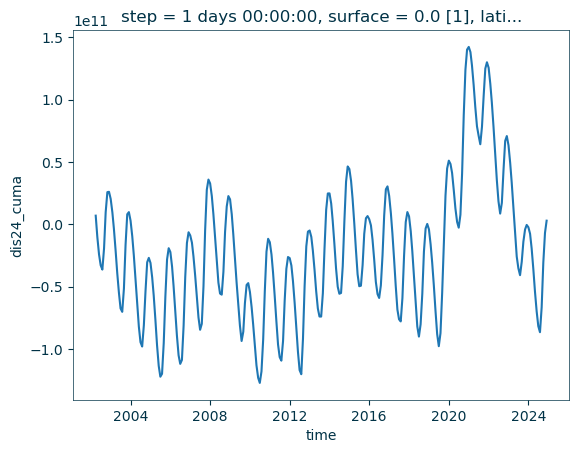

In [81]:
glofas.dis24_cuma.plot()

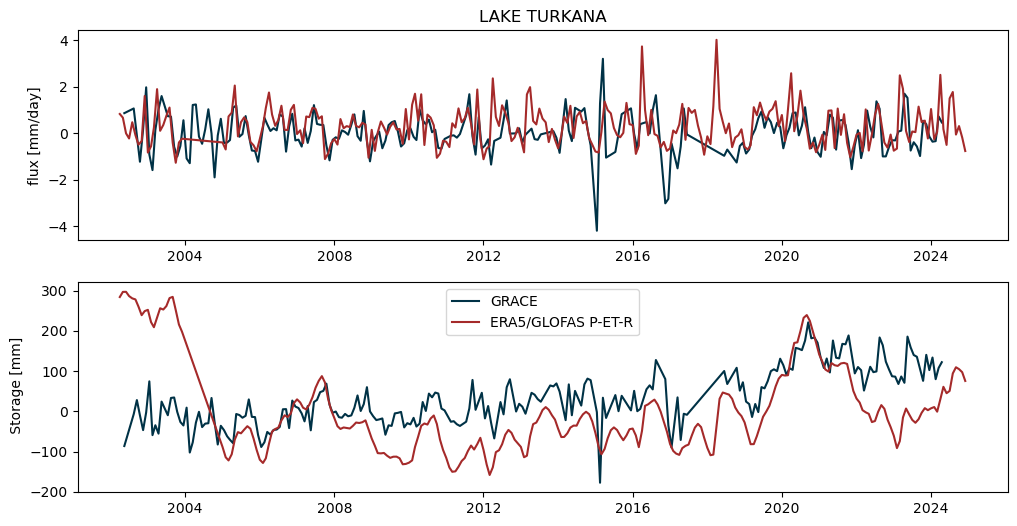

In [109]:
basinname='GULF OF ADEN/SOMALIA'
basinname='DANUBE'
basinname='NILE'
basinname='RUFIJI'
# basinname='SETIT'
# basinname='GARONNE'
# basinname='PO'
# basinname='NEMAN'

# basinname='ANGERMAN'

# basinname='MARITSA'
basinname='LAKE TURKANA'

glofas,era5,tws=make_plot(basin=basinname)


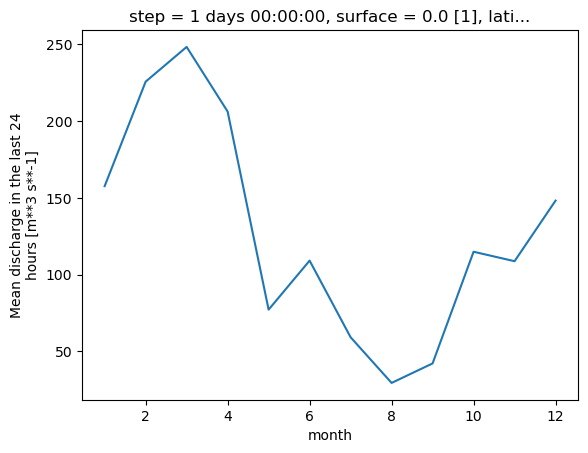

In [105]:
glofas.dis24_clima.plot()

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


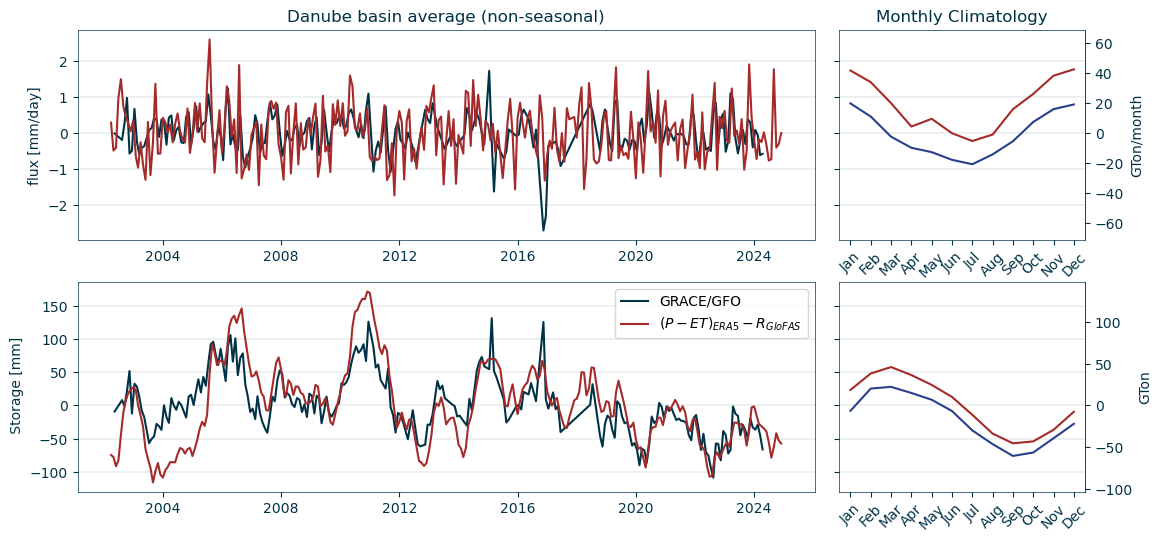

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


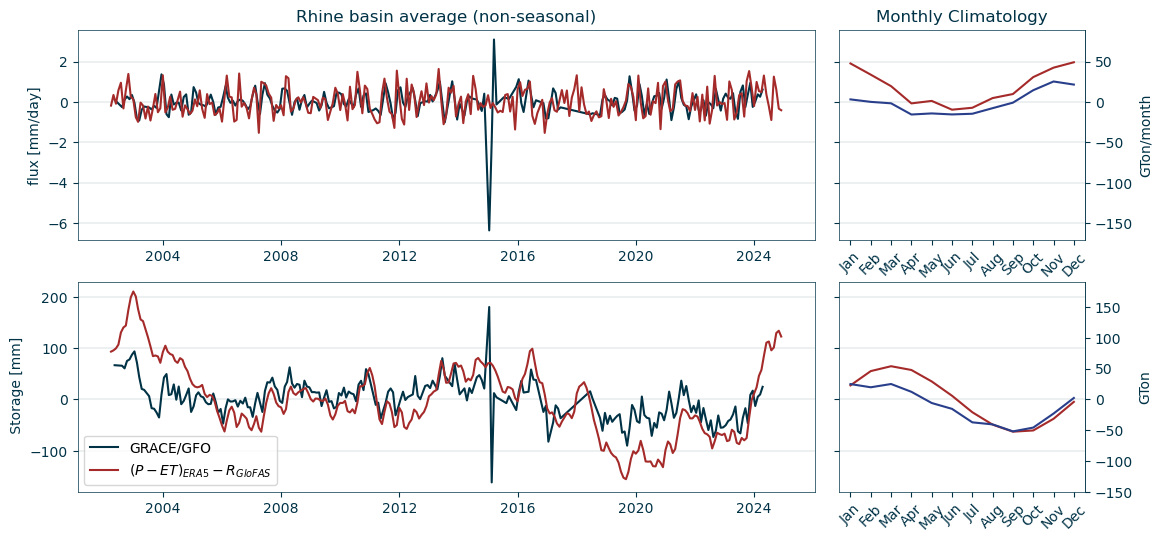

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


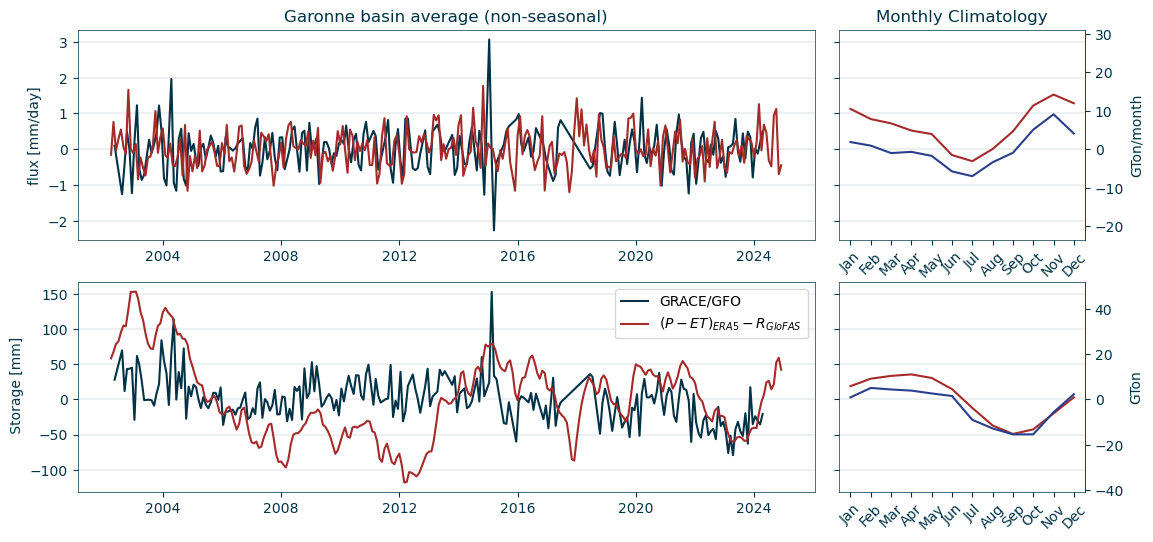

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


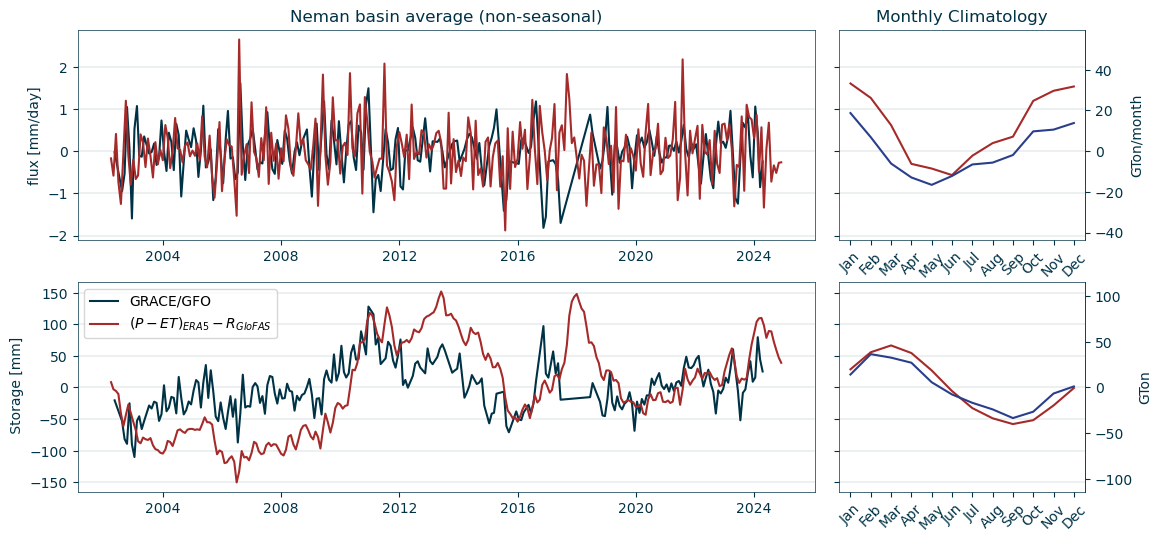

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


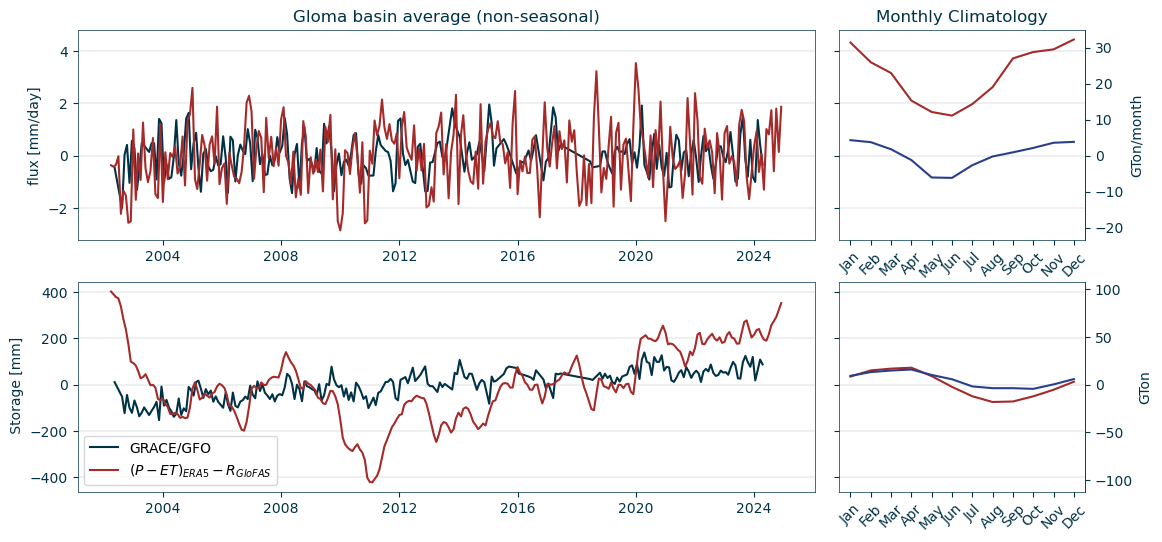

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


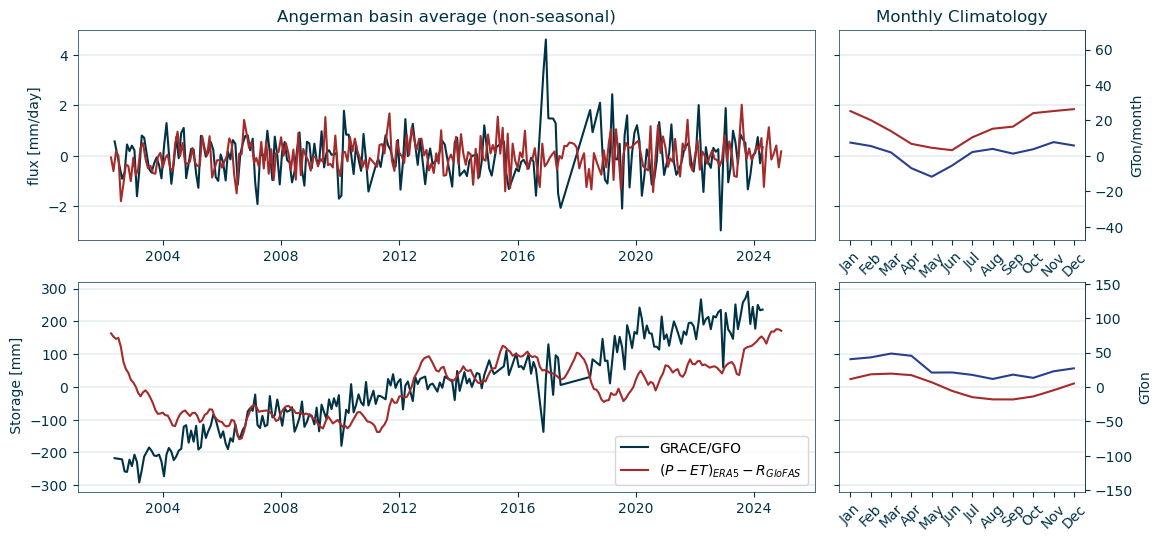

In [78]:
# EU_basins=['DANUBE', 'RHINE','GARONNE','NEMAN','GLOMA','ANGERMAN']

for basin in EU_basins:
    make_plot(basin=basin,savefig=True)
    

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


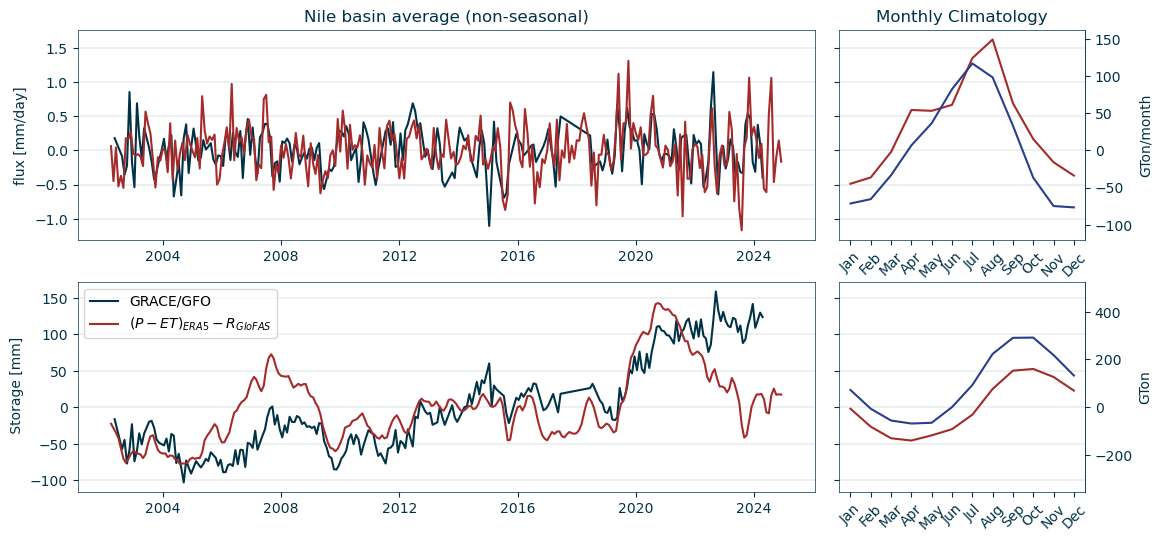

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


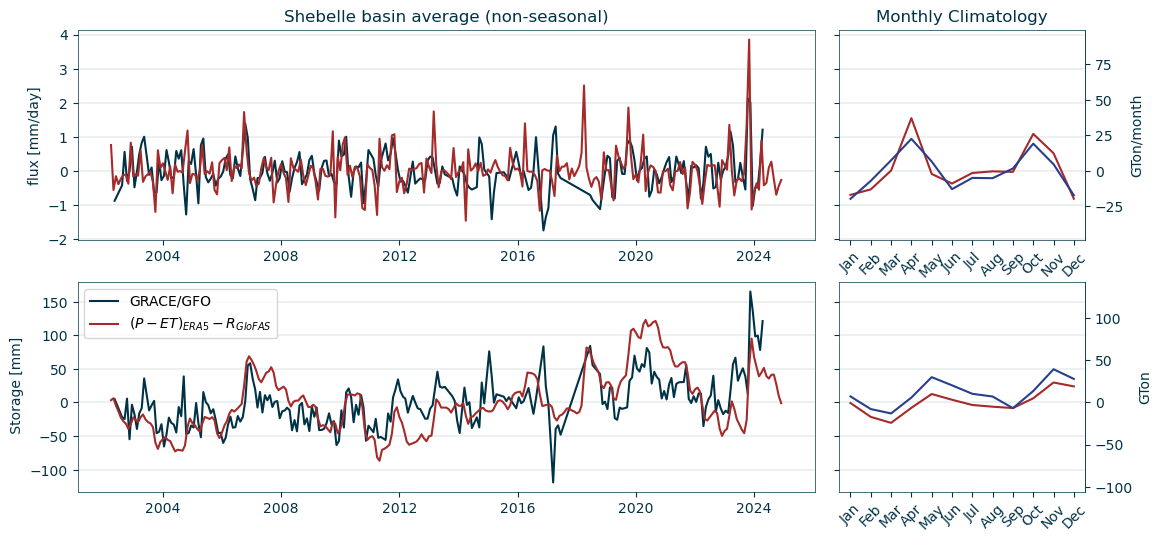

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


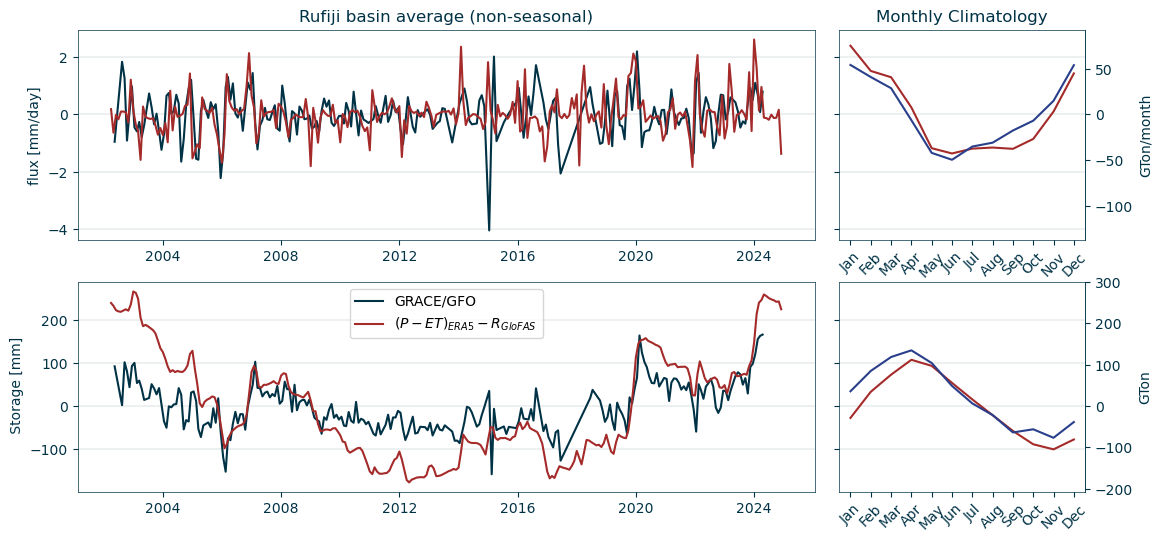

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


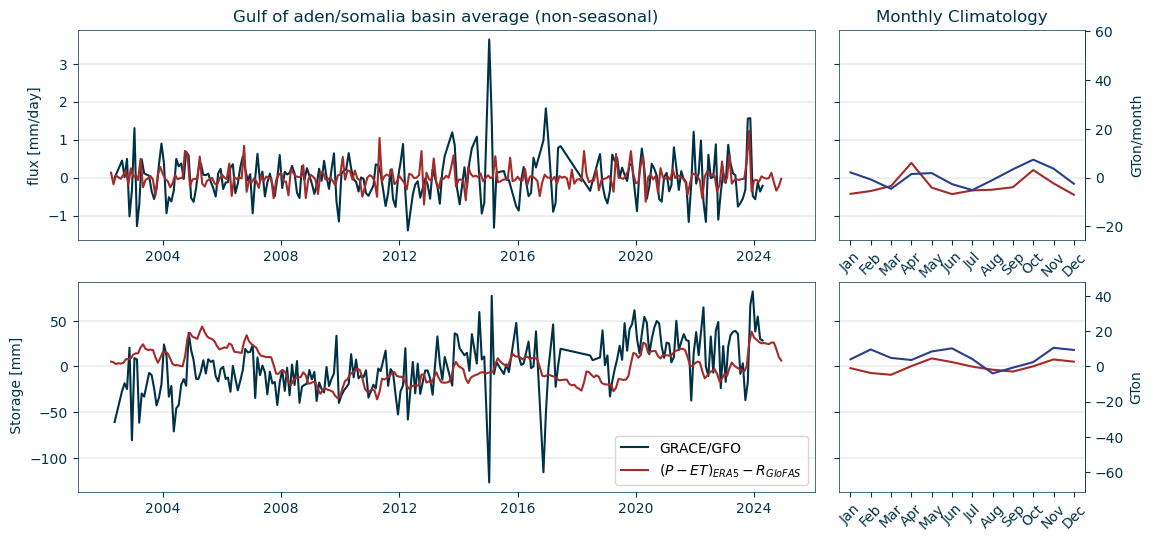

/tmp/ipykernel_6869/3415556690.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axflux_clim.set_xticklabels(months, rotation=45)
/tmp/ipykernel_6869/3415556690.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axstore_clim.set_xticklabels(months, rotation=45)


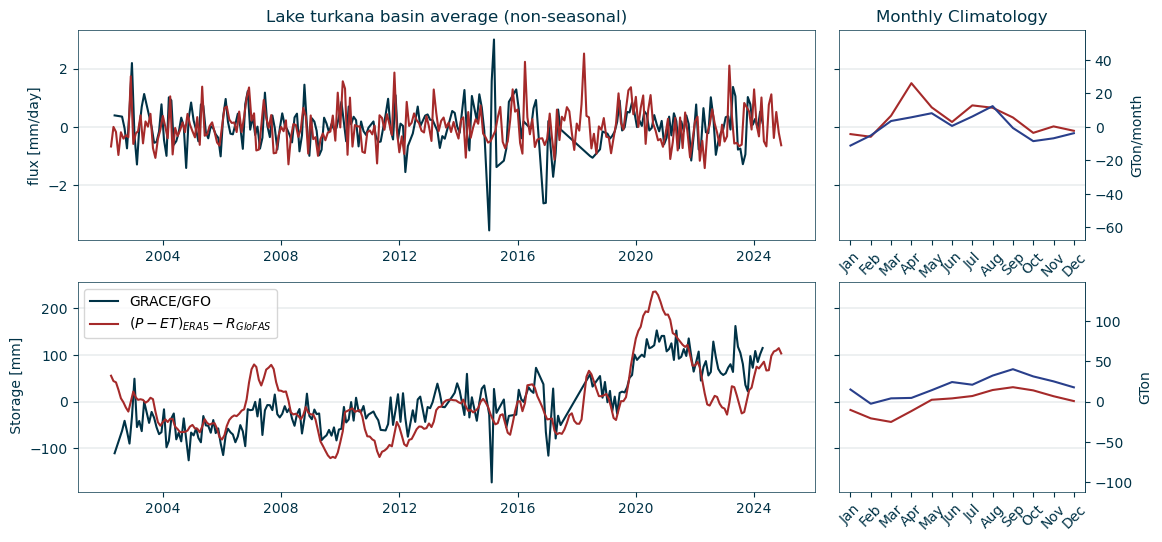

In [79]:
for basin in AF_basins:
    make_plot(basin=basin,savefig=True)